## User defined fragmentation models

Users may use the `ugropy` API to define their own fragmentation models. The
basic models API is the `FragmentationModel` class. Instances of this class
have all the methods and attributes necessary to define a fragmentation model.

In [1]:
from ugropy import FragmentationModel

Groups are defined on a `pandas` DataFrame. This is because is convenient
to store the data in a tabular format, and simply read it from a file. You can
check examples on the repository (https://github.com/ipqa-research/ugropy/blob/main/ugropy/groupscsv/unifac/unifac_subgroups.csv)

We can define a simplified UNIFAC fragmentation model as follows:

In [2]:
import pandas as pd

# We define a simple fragmentation model with some common groups.
df = pd.DataFrame(
    {
        "group": ["CH3", "CH2", "CH", "C", "AC", "ACH", "ACCH3", "ACCH2"],
        "smarts": [
            "[CX4H3]",
            "[CX4H2]",
            "[CX4H]",
            "[CX4H0]",
            "[cH0]",
            "[cH]",
            "[cH0][CX4H3]",
            "[cH0][CX4H2]",
        ]
    }
)

# Set the group column as the index
df.set_index("group", inplace=True)


# Define a fragmentation model using the defined groups. UNIFAC-like models
# doesn't allow overlappin groups or atoms that not belong to any group.
mymodel = FragmentationModel(
    subgroups=df,
    allow_overlapping=False,
    allow_free_atoms=False, 
)

With this instance we can detect fragments and solve groups as any other
`ugropy` model. For example:

In [3]:
sol = mymodel.get_groups("toluene")

sol.subgroups

{'ACH': 5, 'ACCH3': 1}

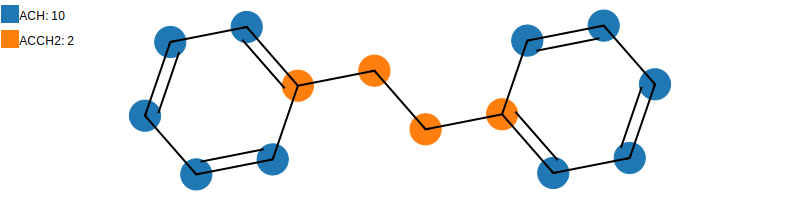

In [4]:
sol = mymodel.get_groups("bibenzyl")

sol.draw(width=800)


The `FragmentationModel.get_groups` method returns a `FragmentationResult`
object. To extend the behavior of the base `FragmentationModel` class, you can
inherit from it and inherit from `FragmentationResult` as well.

An example, could be the `GibbsModel` class and the `GibbsFragmentationResult`
class. The differences between these classes are that receives an extra argument
(the groups' information dataframe). These models work exactly the same but
also calculates the R and Q of the molecule once the fragments are detected.



In [5]:
from ugropy import GibbsFragmentationResult, GibbsModel

You may check these classes source code in the API documentation, it's very
simple to follow and understand how to extend the basic behavior of the base
``FragmentationModel`` class.
